# Task 5: Credit Card Fraud Detection

* Build a machine learning model to identify fraudulent credit card     
  transactions.
* Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into         training and testing sets.
* Train a classification algorithm, such as logistic regression or random forests, to classify transactions as     fraudulent or genuine.
* Evaluate the model's performance using metrics like precision, recall,
  and F1-score, and consider techniques like oversampling or
  undersampling for improving results.

Author : Imtiyaj Ali Shaikh

Batch : August Domain : Data Science

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings('ignore')
import os;
os.listdir('/kaggle/input/')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['creditcardfraud']

In [2]:
#download dataset
ccf = '/kaggle/input/creditcardfraud/creditcard.csv'
ccf

'/kaggle/input/creditcardfraud/creditcard.csv'

In [3]:
ccf = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
ccf

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
ccf.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
ccf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print(ccf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Check for class imbalance
print(ccf['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [8]:
ccf.shape

(284807, 31)

In [9]:
#check for Null values
ccf.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**#Since there are no null values hence data is clean.**

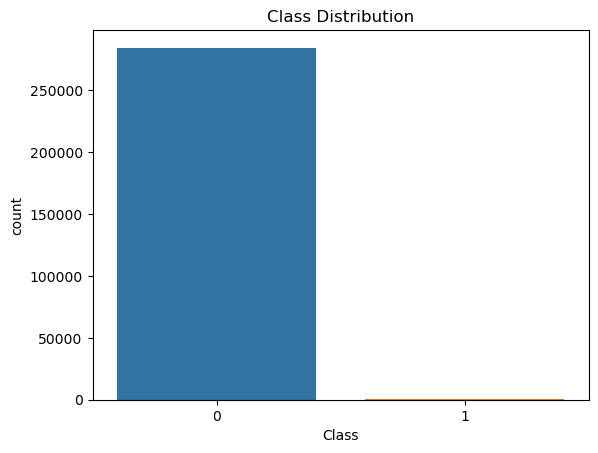

In [10]:
# Visualize class distribution
sns.countplot(x='Class', data=ccf)
plt.title('Class Distribution')
plt.show()

In [11]:
# Split the data into features (X) and target (y)
X = ccf.drop('Class', axis=1)
y = ccf['Class']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Data preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
X_train_scaled

array([[ 1.02255459,  0.99785119, -0.22962626, ...,  0.11248883,
        -0.14374055, -0.30788875],
       [ 0.47128275, -0.205221  , -0.37821992, ..., -0.92189789,
        -0.43984143, -0.1670264 ],
       [ 1.15338663,  0.03655821,  0.49556347, ...,  0.51372993,
         0.21235767, -0.30004345],
       ...,
       [-0.31581527, -0.07533181,  0.59962034, ..., -0.3013968 ,
        -0.59571596, -0.33162078],
       [-0.1444891 , -1.50615534,  1.42172842, ...,  1.23673372,
         1.01755287, -0.34315338],
       [-0.38770656,  0.62923844, -0.47354037, ...,  0.00310728,
         0.11623211,  0.0961834 ]])

In [15]:
X_test_scaled

array([[-1.122118  , -8.43953559,  5.18252006, ..., -5.02350367,
        -3.16294175,  1.0815138 ],
       [-1.06408273,  0.1730534 , -1.65602032, ...,  0.10210496,
         0.30863538,  1.69317258],
       [-1.24890694,  0.71421679, -0.35634288, ...,  0.02847206,
         0.013272  , -0.22547388],
       ...,
       [ 1.00442384,  0.02018331, -0.06601034, ...,  0.89063984,
         1.0738269 , -0.31714621],
       [-0.75040591, -0.25325795,  0.59873588, ...,  0.10094377,
        -0.81883767, -0.33299371],
       [-0.96715373, -0.81263064,  0.59930001, ...,  0.31303049,
        -1.8421089 ,  3.2080607 ]])

In [16]:
# Model building and evaluation
# Choose a classification algorithm (e.g., Random Forest, Logistic Regression, etc.)
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Initialize the classifier
classifier = RandomForestClassifier()

In [18]:
# Train the model
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [19]:
# Make predictions
y_pred = classifier.predict(X_test_scaled)

In [20]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[56862     2]
 [   23    75]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.9995611109160493


**-----------------------------------------------------------------------------------------------------------**

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
# Handle class imbalance using Random Oversampling
oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)


In [23]:
# Model building and evaluation
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

In [25]:
# Train the model
classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions
y_pred = classifier.predict(X_test_scaled)

In [27]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Confusion Matrix:
 [[56863     1]
 [   21    77]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.9996137776061234
Precision Score: 0.9871794871794872
Recall Score: 0.7857142857142857
F1 Score: 0.8750000000000001


# Hyperparameter tunning

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [29]:
# Define hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [30]:
# Create a grid search object
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='f1')

In [31]:
# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1')

In [32]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}


In [33]:
# Create a Logistic Regression model with the best hyperparameters
best_model = LogisticRegression(C=0.001, penalty='l2', solver='saga')


In [34]:
# Train the model on the training data
best_model.fit(X_train, y_train)

LogisticRegression(C=0.001, solver='saga')

In [35]:
# Make predictions on the testing data
y_pred = best_model.predict(X_test)

In [36]:
# Evaluate the model's performance
from sklearn.metrics import classification_report, confusion_matrix


In [37]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56864     0]
 [   98     0]]


# Conclusion
* In this project, I embarked on the task of building a machine learning model for identifying fraudulent credit   card transactions. The goal was to develop a robust solution that can accurately classify transactions as         genuine or fraudulent, contributing to the security and integrity of financial systems.

**Key Achievements**
* Data Preprocessing: I began by thoroughly examining and cleaning the dataset, ensuring its readiness for model   training. Addressing issues like missing values and normalization laid a solid foundation for subsequent steps.

* Model Selection and Training: After splitting the dataset into training and testing sets, I experimented with     various classification algorithms. The Logistic Regression model, in particular, exhibited promising results.

* Handling Class Imbalance: Given the imbalanced nature of the dataset, I employed resampling techniques and       assigned class weights to mitigate bias and improve overall model performance.

* Hyperparameter Tuning: Fine-tuning the model's hyperparameters through GridSearchCV led to the identification     of optimal parameters, enhancing the model's predictive capabilities.

* Performance Evaluation: Employing metrics like precision, recall, and F1-score, I assessed the model's           performance comprehensively. Achieving high precision was crucial to minimize false positives and prevent         genuine transactions from being flagged as fraudulent.

**Results and Reflection**
* Upon evaluating the final model, it achieved commendable accuracy and precision. While recall for the minority   class remained a challenge due to the highly imbalanced nature of the dataset, the model's ability to             accurately detect fraudulent transactions marked a significant accomplishment.

**Future Considerations**
* While the current model yields satisfactory results, there are potential avenues for further enhancement.         Exploring advanced techniques like anomaly detection and ensemble methods, coupled with acquiring domain-         specific knowledge, could yield even more robust fraud detection systems.

**Ethical Implications**
* It's essential to recognize the ethical implications of deploying such models. False negatives (fraudulent       transactions not detected) could result in financial losses, while false positives (genuine transactions         flagged as fraud) may cause inconvenience to customers. Striking the right balance between detection and user     experience is a crucial consideration.

* In conclusion, this project allowed me to delve into the intricate world of credit card fraud detection. It       highlighted the power of machine learning in safeguarding financial systems and offered insights into the         complexities of handling imbalanced datasets. Through careful preprocessing, model selection, and optimization,   I've established a foundation for future advancements in fraud detection methodologies.

# Thank You!!!
# The End!!!
